In [12]:
import numpy as np
import pandas as pd

# generate a bunch of random numbers between 50.0 and 80.0
NUMBER_OF_DATA_POINTS = 25
top_1_representations = np.random.uniform(50.0, 80.0, NUMBER_OF_DATA_POINTS)

# generate a bunch of random numbers between 100 and 1024
ranks = np.random.randint(100, 1024, NUMBER_OF_DATA_POINTS)

architectures = ["VicReg", "SimCLR", "Tobias", "John W."]
datasets = ["CIFAR-10", "CIFAR-100", "ImageNet"]

# Flatten the data list
data = [
    (
        top_1_representations[i % NUMBER_OF_DATA_POINTS],
        ranks[i % NUMBER_OF_DATA_POINTS],
        architectures[i % 4],
        dataset,
    )
    for dataset in datasets
    for i in range(NUMBER_OF_DATA_POINTS)
]

df = pd.DataFrame(
    data, columns=["Top-1 Representation", "Rank", "Architecture", "Dataset"]
)

/Users/linusostlund/anaconda3/envs/pytorch_tutorials/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/linusostlund/anaconda3/envs/pytorch_tutorials/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/linusostlund/anaconda3/envs/pytorch_tutorials/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/linusostlund/anaconda3/envs/pytorch_tutorials/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureW

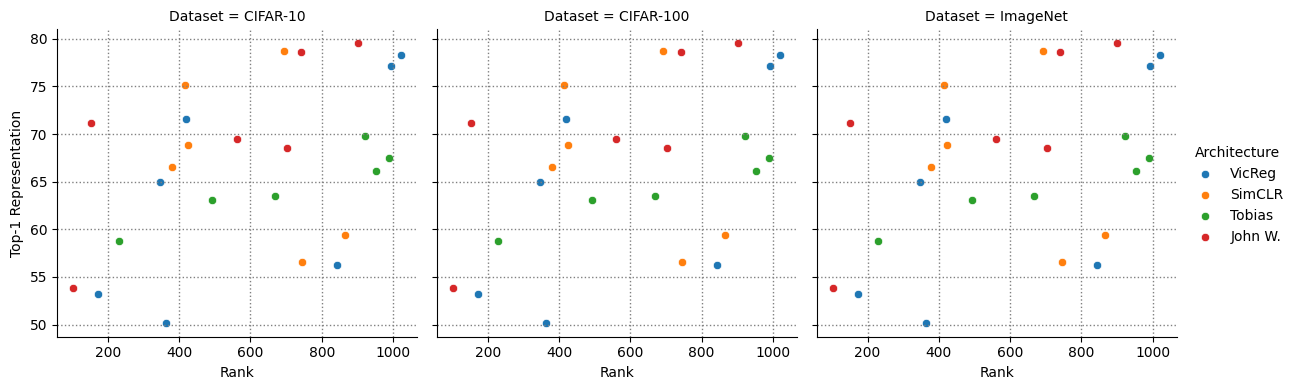

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_rank_representation(df: pd.DataFrame) -> None:
    """
    Plot the rank vs. representation for each dataset, with architecture as a hue.
    @param df: The dataframe containing the data to plot.
    Data has to be in the format:
    | Top-1 Representation | Rank | Architecture | Dataset |
    |----------------------|------|--------------|---------|
    | float                | int  | String       | String  |
    return: None, but shows the plot :-)
    """

    g = sns.FacetGrid(
        df, col="Dataset", hue="Architecture", col_wrap=3, height=4, aspect=1
    )

    # Map a scatter plot to each Facet
    g.map(sns.scatterplot, "Rank", "Top-1 Representation")

    g.map(plt.grid, linestyle=":", linewidth=1, color="gray")

    # Add a legend and grid to each plot
    g.add_legend()
    g.set_axis_labels("Rank", "Top-1 Representation")
    # g.add_gridspec(hspace=0.4, wspace=0.4)

    # Show the plots
    plt.show()


plot_rank_representation(df)

In [42]:
# read in the file "runs.csv" and store it as a pandas datafram
import pandas as pd

df = pd.read_csv("runs.csv")

df.head()


# print(df.columns)

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,batch_size,cov_coeff,...,workers,CIFAR100_accuracy,CIFAR100_rank,acc/top1,acc/top5,caltech101_accuracy,caltech101_rank,learning_rate,loss,rankme_rank
0,2023-12-05 02:00:58,7.4d,4585dd16b1194889966a6fcb32b35826,run_20231205_020100_vicreg,PROJECT,file:///home/wikman/GitRepos/johnwikman/rankme...,wikman,FINISHED,1024,25.0,...,24,9.46,4.705278,NaN,NaN,21.658986,5.278788,0.010546,3.857883,6.966148
1,2023-12-05 01:02:24,7.5d,0b637088c86548fda78abf7c7f7075e8,run_20231205_010226_vicreg,PROJECT,file:///home/wikman/GitRepos/johnwikman/rankme...,wikman,FINISHED,1024,25.0,...,24,7.39,2.859051,NaN,NaN,16.186636,3.474688,0.010546,1.952186,4.734260
2,2023-12-05 00:03:56,7.5d,63a8214e9cd640debea115ed94b1bd1b,run_20231205_000358_vicreg,PROJECT,file:///home/wikman/GitRepos/johnwikman/rankme...,wikman,FINISHED,1024,25.0,...,24,5.30,1.706043,NaN,NaN,16.186636,1.773947,0.010546,0.984788,1.847962
3,2023-12-04 23:05:18,7.6d,bb8517bb42f841399c9aebe7e970e682,run_20231204_230521_vicreg,PROJECT,file:///home/wikman/GitRepos/johnwikman/rankme...,wikman,FINISHED,1024,25.0,...,24,7.99,1.849233,NaN,NaN,19.354839,1.960329,0.010546,0.886632,2.267232
4,2023-12-04 22:06:47,7.6d,a7d91cc5eacb4436b45556ffe7b75a25,run_20231204_220649_vicreg,PROJECT,file:///home/wikman/GitRepos/johnwikman/rankme...,wikman,FINISHED,1024,25.0,...,24,8.85,1.441005,NaN,NaN,24.539171,1.477112,0.010546,0.789157,1.619991


In [170]:
df_subset = df[
    [
        "Name",
        "CIFAR100_accuracy",
        "caltech101_accuracy",
        "rankme_rank",
    ]
]

df_subset.head(-5)
df_subset["Model"] = df_subset["Name"].str.extract(r"([^_]+)$")

# drop the row where "Model" is "simclr (IGNORE THIS)"
df_subset = df_subset[df_subset["Model"] != "simclr (IGNORE THIS)"]
df_subset.head(57)

/var/folders/83/98myw3z12g54w68xdgf74xt80000gn/T/ipykernel_76864/3444031634.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Model"] = df_subset["Name"].str.extract(r"([^_]+)$")


,Name,CIFAR100_accuracy,caltech101_accuracy,rankme_rank,Model
0,run_20231205_020100_vicreg,9.46,21.658986,6.966148,vicreg
1,run_20231205_010226_vicreg,7.39,16.186636,4.734260,vicreg
2,run_20231205_000358_vicreg,5.30,16.186636,1.847962,vicreg
3,run_20231204_230521_vicreg,7.99,19.354839,2.267232,vicreg
4,run_20231204_220649_vicreg,8.85,24.539171,1.619991,vicreg
5,run_20231204_210813_vicreg,5.45,19.470046,1.656170,vicreg
6,run_20231204_201002_vicreg,1.00,9.216590,1.022741,vicreg
7,run_20231204_191145_vicreg,1.00,9.216590,1.022682,vicreg
8,run_20231204_181319_vicreg,1.00,9.216590,1.022949,vicreg
9,run_20231204_171502_vicreg,1.00,9.216590,1.023205,vicreg


In [70]:
df_subset.shape

(57, 5)

In [235]:
import pandas as pd

# Assuming df_subset is a subset of your original DataFrame
run_name = df_subset["Name"]
cifar_100_accuracy = df_subset["CIFAR100_accuracy"]
caltech_101_accuracy = df_subset["caltech101_accuracy"]
rankme_rank = df_subset["rankme_rank"]
model = df_subset["Model"]

# Creating DataFrame for CIFAR100
cifar100_df = pd.DataFrame(
    {
        "run_name": run_name,
        # use regex to extract the model name from the run name "_vicreg" or "_simclr"
        "Model": model,
        "Dataset": "CIFAR-100",
        "Accuracy": cifar_100_accuracy,
        "Rank": rankme_rank,
    }
)

# Creating DataFrame for caltech101 and appending it
caltech_df = pd.DataFrame(
    {
        "run_name": run_name,
        "Model": model,
        "Dataset": "Caltech 101",
        "Accuracy": caltech_101_accuracy,
        "Rank": rankme_rank,
    }
)

df_cleaned = pd.concat([cifar100_df, caltech_df], ignore_index=True)


# Display the first few rows of the DataFrame
df_cleaned.shape

df_cleaned.to_csv("cleaned_runs.csv", index=False)

<Axes: ylabel='Frequency'>

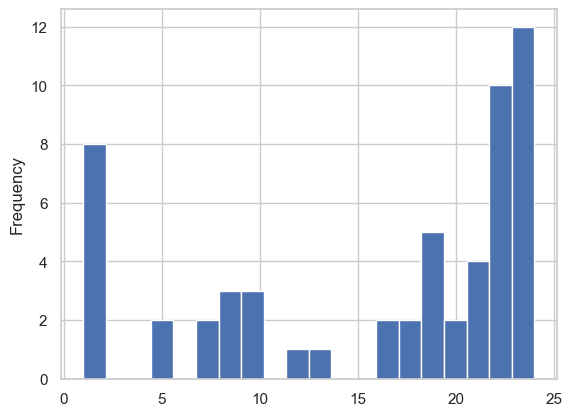

In [81]:
print(df_cleaned.shape)

df_cleaned.groupby(["run_name", "Rank"]).count()

(114, 5)


,,Model,Dataset,Accuracy
run_name,Rank,,,
run_20231201_163222_simclr (IGNORE THIS),323.022003,2,2,2
run_20231201_163516_simclr,307.963135,2,2,2
run_20231201_174352_simclr,223.852615,2,2,2
run_20231201_185114_simclr,134.919510,2,2,2
run_20231201_195835_simclr,79.319633,2,2,2
run_20231201_210601_simclr,36.053566,2,2,2
run_20231201_221331_simclr,25.982035,2,2,2
run_20231201_232055_simclr,288.845703,2,2,2
run_20231202_002834_simclr,252.195908,2,2,2


# ÅTERSKAPA DERAS FULPLOT


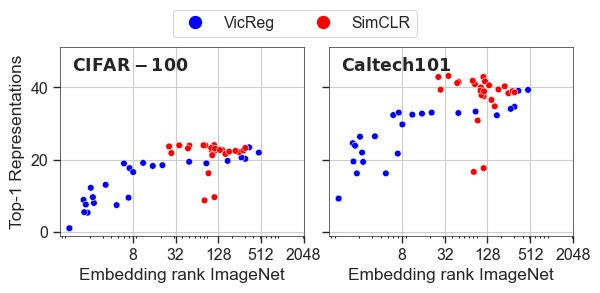

In [248]:
from matplotlib import rcParams

import matplotlib as mpl

mpl.rc("font", family="serif", serif="Times New Roman")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Set style
# For more detailed control using rc parameters
sns.set_theme(style="whitegrid", font="sans-serif")
sns.set_style("ticks")
# change font
sns.set_context("paper", font_scale=1.3)
# Colors dictionary
color_palette = {"vicreg": "blue", "simclr": "red"}

# Create the plot using relplot
g = sns.relplot(
    data=df_cleaned,
    x="Rank",
    y="Accuracy",
    col="Dataset",
    hue="Model",
    kind="scatter",
    height=3,
    palette=color_palette,
    # legend=False,
)

# Set labels
g.set_axis_labels("Embedding rank ImageNet", "Top-1 Representations")

# Specific ticks to be displayed
specific_ticks = [8, 32, 128, 512, 2048]

# Setting log scale and specific ticks for each axis
for ax in g.axes.flat:
    ax.set_xscale("log", base=2)
    ax.set_xticks(specific_ticks)
    ax.set_xticklabels(specific_ticks)
    ax.grid()
    # Add right and top spines
    # Enable minor ticks for log scale
    ax.xaxis.set_minor_locator(ticker.LogLocator(subs="auto"))
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    # make these tickes smaller
    ax.tick_params(axis="x", which="minor", size=1.5)

    # Adjust y-axis range
    current_ylim = ax.get_ylim()
    new_ylim = (current_ylim[0], current_ylim[1] + 3)
    ax.set_ylim(new_ylim)

    # make it spiny
    ax.spines["right"].set_visible(True)
    ax.spines["top"].set_visible(True)
    # Make the plot border lines thinner
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the number to make it thinner or thicker

    # Customizing subplot titles
for ax, title in zip(g.axes.flat, g.col_names):
    bold_title = r"$\bf{" + title + "}$"
    ax.set_title(bold_title, y=1.05, pad=-24, ha="left", position=(0.05, 7))


# Move the legend above the plots
# Add the legend above the plots
plt.subplots_adjust(top=0.85)  # Adjust the subplot to make room for the legend


# Move the legend above the plots
handles, labels = g.axes.flat[0].get_legend_handles_labels()

# First, remove the existing legend
g._legend.remove()

# Then, add a new legend with correct labels and position
g.fig.legend(
    handles=handles,
    labels=["VicReg", "SimCLR"],
    loc="upper center",
    bbox_to_anchor=(0.45, 1.0),
    ncol=len(color_palette),
    markerscale=2,
)

# Display the plot
plt.show()

# save image as "scatter_plot.png"
g.savefig("scatter_plot.png", dpi=300, bbox_inches="tight")

# LÅT MIG LÄGGA IN EN LITEN LINJE BRODER


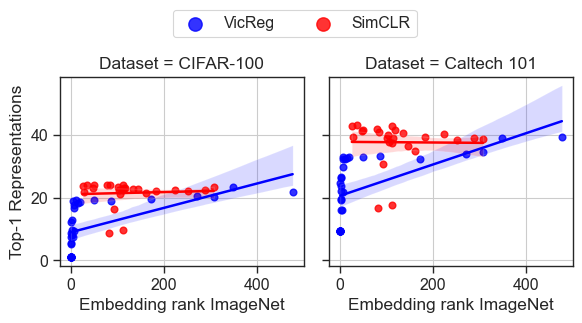

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")
sns.set_style("ticks")
# change font
sns.set_context("paper", font_scale=1.3)

# Colors dictionary
color_palette = {"vicreg": "blue", "simclr": "red", "simclr (IGNORE THIS)": "white"}

# Create the plot using relplot
g = sns.lmplot(
    data=df_cleaned,
    x="Rank",
    y="Accuracy",
    col="Dataset",
    hue="Model",
    height=3,
    palette=color_palette,
    # legend=False,
)

# Set labels
g.set_axis_labels("Embedding rank ImageNet", "Top-1 Representations")

# Specific ticks to be displayed
specific_ticks = [8, 32, 128, 512, 2048]

# Setting log scale and specific ticks for each axis
for ax in g.axes.flat:
    # ax.set_xscale("log", base=2)
    # ax.set_xticks(specific_ticks)
    # ax.set_xticklabels(specific_ticks)
    ax.grid()
    # Add right and top spines
    ax.spines["right"].set_visible(True)
    ax.spines["top"].set_visible(True)

# Move the legend above the plots
# Add the legend above the plots
plt.subplots_adjust(top=0.85)  # Adjust the subplot to make room for the legend


# Move the legend above the plots
handles, labels = g.axes.flat[0].get_legend_handles_labels()

# First, remove the existing legend
g._legend.remove()

# Then, add a new legend with correct labels and position
g.fig.legend(
    handles=handles,
    labels=["VicReg", "SimCLR"],
    loc="upper center",
    bbox_to_anchor=(0.45, 1.1),
    ncol=len(color_palette),
    markerscale=2,
)
# Display the plot
plt.show()

# save image as "regression_plot.png"
g.savefig("regression_plot.png", dpi=300, bbox_inches="tight")

# CHATGPT BAH "HÄR E PVÄRDET BRODER"


Dataset: CIFAR100, Model: vicreg, P-value: 0.000
Dataset: CIFAR100, Model: simclr, P-value: 0.756
Dataset: CIFAR100, Model: simclr (IGNORE THIS), P-value: nan
Dataset: caltech101, Model: vicreg, P-value: 0.001
Dataset: caltech101, Model: simclr, P-value: 0.954
Dataset: caltech101, Model: simclr (IGNORE THIS), P-value: nan


/Users/linusostlund/anaconda3/envs/mlflow-f586764d646414a790bc61ed5c756cb54957e1aa/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/linusostlund/anaconda3/envs/mlflow-f586764d646414a790bc61ed5c756cb54957e1aa/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/linusostlund/anaconda3/envs/mlflow-f586764d646414a790bc61ed5c756cb54957e1aa/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


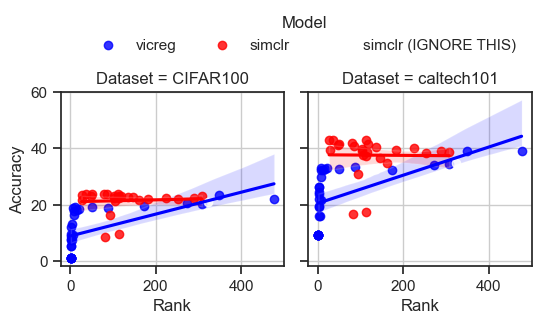

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Assuming df_cleaned is your DataFrame
# Set style
sns.set_theme(style="whitegrid")
sns.set_style("ticks")

# Colors dictionary
palette = {"vicreg": "blue", "simclr": "red", "simclr (IGNORE THIS)": "white"}

# Create the lmplot
g = sns.lmplot(
    data=df_cleaned,
    x="Rank",
    y="Accuracy",
    col="Dataset",
    hue="Model",
    palette=palette,
    height=3,
    legend=False,
)

# Adjust subplot parameters to give some space for the legend
g.fig.subplots_adjust(top=0.8)

# Setting log scale and specific ticks for each axis
for ax in g.axes.flat:
    # ax.set_xscale("log", base=2)
    # ax.set_xticks(specific_ticks)
    # ax.set_xticklabels(specific_ticks)
    ax.grid()
    # Add right and top spines
    ax.spines["right"].set_visible(True)
    ax.spines["top"].set_visible(True)

# Move the legend above the plots
g.add_legend(
    title="Model", loc="upper center", bbox_to_anchor=(0.35, 1.1), ncol=len(palette)
)

# Calculate and print p-values
for dataset in df_cleaned["Dataset"].unique():
    for model in df_cleaned["Model"].unique():
        subset = df_cleaned[
            (df_cleaned["Dataset"] == dataset) & (df_cleaned["Model"] == model)
        ]
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            subset["Rank"], subset["Accuracy"]
        )
        print(f"Dataset: {dataset}, Model: {model}, P-value: {p_value:.3f}")

# Display the plot
plt.show()

In [195]:
import pandas as pd

# Define the data
data = {
    "Dataset": ["CIFAR100", "CIFAR100", "Caltech101", "Caltech101"],
    "Model": ["vicreg", "simclr", "vicreg", "simclr"],
    "P-value": [0.000, 0.756, 0.001, 0.954],
}

# Convert the dictionary to a DataFrame
df_pvalues = pd.DataFrame(data).to_latex(index=False)

df_pvalues

'\\begin{tabular}{llr}\n\\toprule\nDataset & Model & P-value \\\\\n\\midrule\nCIFAR100 & vicreg & 0.000000 \\\\\nCIFAR100 & simclr & 0.756000 \\\\\nCaltech101 & vicreg & 0.001000 \\\\\nCaltech101 & simclr & 0.954000 \\\\\n\\bottomrule\n\\end{tabular}\n'

CIFAR100 | vicreg, P-value: 0.000
CIFAR100 | simclr, P-value: 0.756
Caltech101 | vicreg, P-value: 0.001
Caltech101 | simclr, P-value: 0.954


/Users/linusostlund/anaconda3/envs/mlflow-f586764d646414a790bc61ed5c756cb54957e1aa/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/Users/linusostlund/anaconda3/envs/mlflow-f586764d646414a790bc61ed5c756cb54957e1aa/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


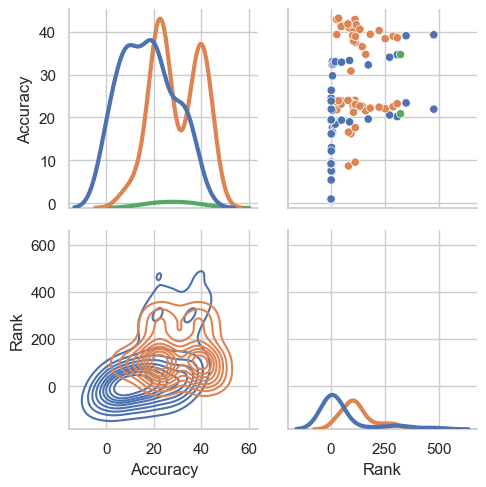

In [49]:
g = sns.PairGrid(df_cleaned, hue="Model")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

<Axes: xlabel='Model', ylabel='Rank'>

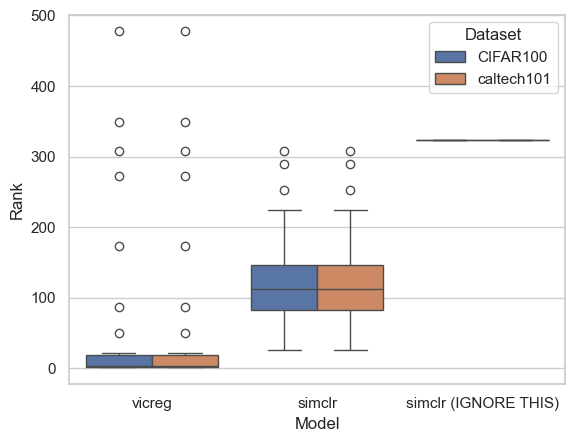

In [59]:
sns.boxplot(x="Model", y="Rank", hue="Dataset", data=df_cleaned)